# Install Packages

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install shap
%pip install scikit-learn
%pip install imbalanced-learn
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install pandas
%pip install torch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shap

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from scipy.stats import shapiro

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold, GridSearchCV

from sklearn.model_selection import cross_validate
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score,average_precision_score,
                             recall_score, f1_score, confusion_matrix,auc,
                             ConfusionMatrixDisplay, classification_report, roc_curve,make_scorer)

from scipy.stats import spearmanr
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import time
import psutil
import os
import pickle
import torch
import joblib
from sklearn.utils import resample
from sklearn.model_selection import learning_curve
from tensorflow.keras import regularizers

d:\Tensorflow\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df = pd.read_csv("./Pima Indians diabetes.csv")

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
# Rename the column 'Outcome' to 'Diabetes'
df.rename(columns={'Outcome': 'Diabetes'}, inplace=True)
df.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace=True)

In [9]:
# Check for Missing values , No missing value found
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Diabetes         0
dtype: int64

In [10]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Diabetes       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Compute descriptive statistics for the entire dataset
descriptive_stats = df.describe()
print("Descriptive Statistics for the entire dataset:\n", descriptive_stats)

Descriptive Statistics for the entire dataset:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI         DPF         Age    Diabetes  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000  

# Phase 2: Data Pre-Processing / Data Understanding

# EDA

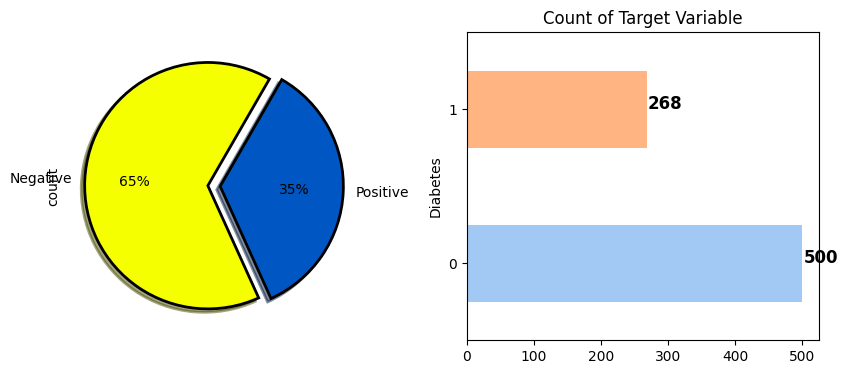

In [12]:
plt.figure(figsize=(10,4))
# Pie Chart - Distribution of Target Variable
plt.subplot(121)
df["Diabetes"].value_counts().plot.pie(
    autopct="%1.0f%%",
    colors=sns.color_palette("prism", 7),
    startangle=60,
    labels=["Negative", "Positive"],
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[.1, 0],
    shadow=True
)

# Horizontal Bar Chart - Count of Target Variable
plt.subplot(122)
ax = df["Diabetes"].value_counts().plot(kind="barh", color=sns.color_palette("pastel", 2))

# Annotate the bars with count values
for i, j in enumerate(df["Diabetes"].value_counts().values):
    ax.text(j + 2, i, str(j), weight="bold", fontsize=12)

plt.title("Count of Target Variable")
plt.show()

In [13]:
df_1 = df.copy()
df_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Multi-Variate Analysis


In [14]:
## Normality Test

# List of continuous variables to test
continuous_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age','Diabetes']
# Perform Shapiro-Wilk test for normality for all variables
shapiro_results = {}
for variable in continuous_variables:
    statistic, p_value = shapiro(df_1[variable])
    # Round the results to 2 decimal places
    shapiro_results[variable] = {'statistic': round(statistic, 2), 'p_value': round(p_value, 2)}
# Convert results to DataFrame for easier readability
shapiro_df = pd.DataFrame(shapiro_results).T

# Print the Shapiro-Wilk test results
print("Shapiro-Wilk Test Results:")
print(shapiro_df)

Shapiro-Wilk Test Results:
               statistic  p_value
Pregnancies         0.90      0.0
Glucose             0.97      0.0
BloodPressure       0.82      0.0
SkinThickness       0.90      0.0
Insulin             0.72      0.0
BMI                 0.95      0.0
DPF                 0.84      0.0
Age                 0.87      0.0
Diabetes            0.60      0.0


In [15]:
# Calculate the Spearman correlation matrix
# Initialize empty lists to store the correlation coefficients and p-values
correlation_matrix = pd.DataFrame(index=df_1.columns, columns=df_1.columns)
p_value_matrix = pd.DataFrame(index=df_1.columns, columns=df_1.columns)


for var1 in df_1.columns:
    for var2 in df_1.columns:
        if var1 != var2:
            #Spearman
            corr, p_val = spearmanr(df_1[var1], df_1[var2])
            correlation_matrix.loc[var1, var2] = round(corr, 2)
            p_value_matrix.loc[var1, var2] = round(p_val, 4)

# Display the Spearman correlation matrix
print("Spearman Correlation Matrix:\n", correlation_matrix)

# Display the p-value matrix
print("\nSpearman P-value Matrix:\n", p_value_matrix)

Spearman Correlation Matrix:
               Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
Pregnancies           NaN    0.13          0.19         -0.09   -0.13   0.0   
Glucose              0.13     NaN          0.24          0.06    0.21  0.23   
BloodPressure        0.19    0.24           NaN          0.13   -0.01  0.29   
SkinThickness       -0.09    0.06          0.13           NaN    0.54  0.44   
Insulin             -0.13    0.21         -0.01          0.54     NaN  0.19   
BMI                   0.0    0.23          0.29          0.44    0.19   NaN   
DPF                 -0.04    0.09          0.03          0.18    0.22  0.14   
Age                  0.61    0.29          0.35         -0.07   -0.11  0.13   
Diabetes              0.2    0.48          0.14          0.09    0.07  0.31   

                DPF   Age Diabetes  
Pregnancies   -0.04  0.61      0.2  
Glucose        0.09  0.29     0.48  
BloodPressure  0.03  0.35     0.14  
SkinThickness  0.18 -0.07     0

# Spearman Correlation Analysis

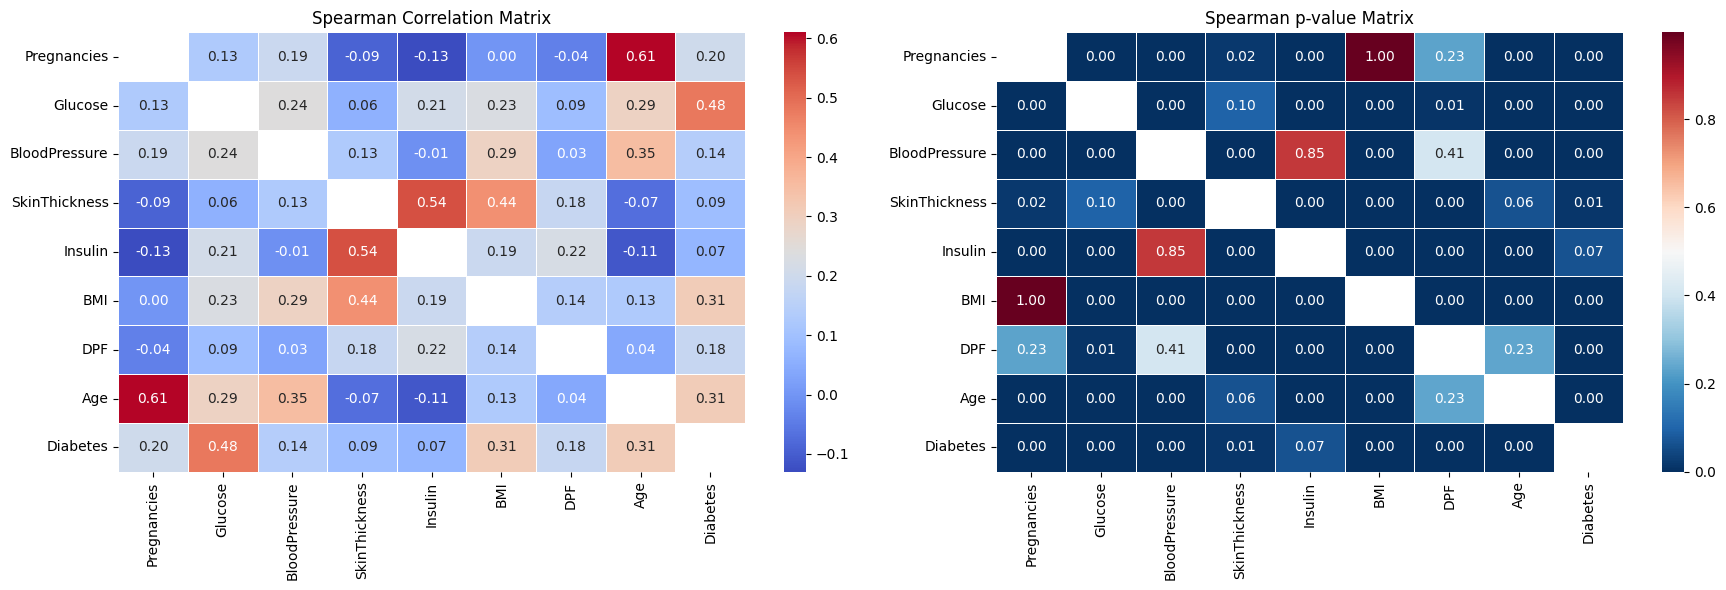

In [16]:
# Plot the Spearman Correlation Matrix heatmap
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the Spearman Correlation Matrix heatmap on the first subplot
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, ax=axes[0])
axes[0].set_title('Spearman Correlation Matrix')

# Plot the p-value matrix heatmap on the second subplot
sns.heatmap(p_value_matrix.astype(float), annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5, cbar=True, ax=axes[1])
axes[1].set_title('Spearman p-value Matrix')

plt.tight_layout()
plt.show()

# Function for Model Evaluation

In [17]:
model = list()
resample = list()
precision = list()
F1score = list()
AUCROC = list()
AUCPRC = list()
Sensitivity = list()
Specificity = list()
gmeans = list()

def test_eval(clf_model, X_test, y_test, algo='Model', sampling=None,
              precision=[], recall=[], F1score=[], AUCROC=[], AUCPRC=[],
              resample=[], Sensitivity=[], Specificity=[], gmeans=[], model_names=[]):
    # Test set prediction
    y_prob = clf_model.predict_proba(X_test)
    y_pred = clf_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Append model name to model_names list
    model_names.append(algo)

    # Calculate metrics
    precision_val = precision_score(y_test, y_pred)
    recall_val = recall_score(y_test, y_pred)
    f1score_val = f1_score(y_test, y_pred)
    aucroc_val = roc_auc_score(y_test, y_prob[:, 1])
    sensitivity_val = recall_val  
    specificity_val = tn / (tn + fp) if (tn + fp) > 0 else 0
    aucprc_val = average_precision_score(y_test, y_prob[:, 1])
    g_mean_val = (sensitivity_val * specificity_val) ** 0.5

    # Print metrics
    print('Confusion Matrix')
    print('='*60)
    print(cm, "\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test, y_pred), "\n")
    print('AUC-ROC')
    print('='*60)
    print(f"{aucroc_val:.4f}")
    print('='*60)
    print('AUC-PRC')
    print('='*60)
    print(f"{aucprc_val:.4f}")
    print('='*60)
    print(f"{'Sensitivity (Recall)':<25}: {sensitivity_val:.4f}")
    print(f"{'Specificity':<25}: {specificity_val:.4f}")
    print(f"{'G-Mean':<25}: {g_mean_val:.4f}")
    print('='*60)

    precision.append(precision_val)
    recall.append(recall_val)
    F1score.append(f1score_val)
    AUCROC.append(aucroc_val)
    AUCPRC.append(aucprc_val)
    Sensitivity.append(sensitivity_val)
    Specificity.append(specificity_val)

In [18]:
X_1 = df.drop(columns=['Diabetes'])  # Independent variables
y_1 = df['Diabetes']  # Target variable

In [19]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
x_1scaled = scaler.fit_transform(X_1)

## PCA

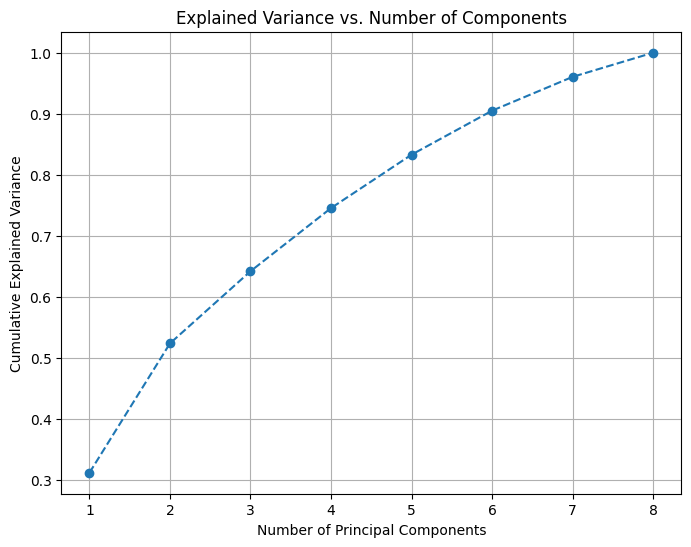

In [20]:
pca_1 = PCA()
#Fit and transform data
pca_1_features_bef = pca_1.fit_transform(x_1scaled)

#Explained variance ratio per component
explained_variance = pca_1.explained_variance_ratio_

#Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [21]:
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to explain at least 90% variance: {n_components}")

Number of components to explain at least 90% variance: 6


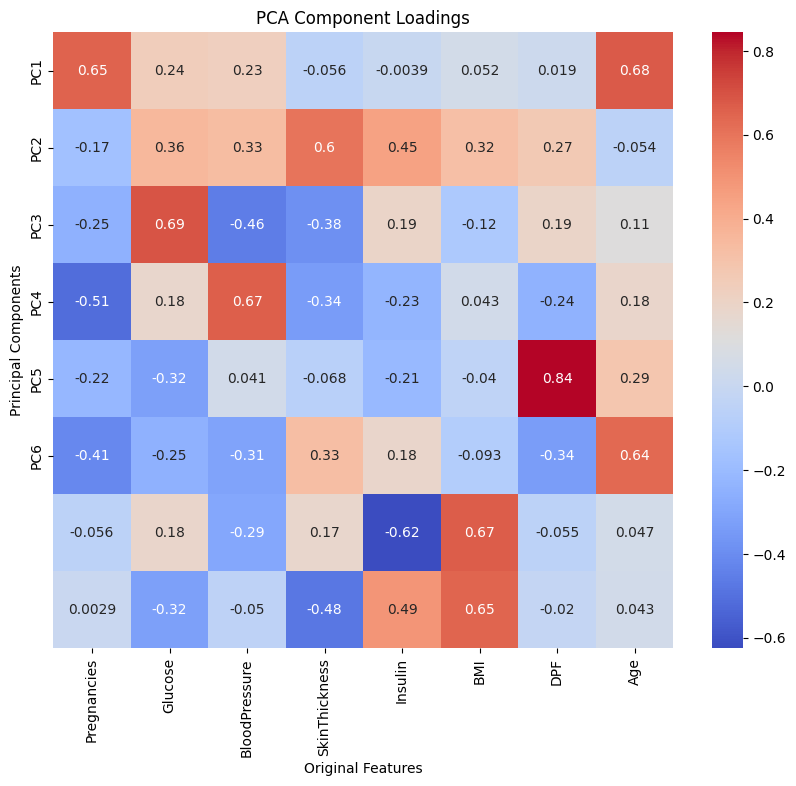

In [22]:
# Get the components (the loadings) from the PCA object
components = pca_1.components_

# Create a heatmap of the loadings (features' contribution to each component)
plt.figure(figsize=(10, 8))
sns.heatmap(components, annot=True, cmap='coolwarm', xticklabels=X_1.columns, yticklabels=[f'PC{i+1}' for i in range(6)])
plt.title('PCA Component Loadings')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

In [23]:
pca = PCA(n_components=8)

pca_features = pca.fit_transform(x_1scaled)
pca_features

array([[ 0.30495538,  0.09038229,  0.02011175, ...,  0.09009241,
         0.12092888, -0.13542339],
       [-0.19329811, -0.07295217, -0.12766305, ...,  0.13436433,
         0.00488866, -0.0812779 ],
       [ 0.21810848, -0.12757474,  0.2673148 , ..., -0.28077412,
        -0.01448334, -0.13073403],
       ...,
       [ 0.00526229, -0.02210395, -0.04384247, ..., -0.01431962,
        -0.08530155, -0.05038918],
       [ 0.04523188, -0.18898757,  0.17441358, ...,  0.16770015,
         0.05337682,  0.04077885],
       [-0.2650889 , -0.01445655, -0.14766768, ...,  0.03575962,
         0.03875296, -0.07437328]])

In [24]:
# Check the shape of the components matrix (loadings)
print("Shape of PCA components:", pca.components_.shape)  

Shape of PCA components: (8, 8)


In [25]:
explained_variance_transform = pca_1.explained_variance_ratio_

print(f"Explained variance per component: {explained_variance_transform}")

cumulative_variance = np.cumsum(explained_variance_transform)
print(f"Cumulative explained variance: {cumulative_variance}")

Explained variance per component: [0.31192249 0.21186663 0.11819693 0.10349153 0.08744447 0.07211478
 0.05540392 0.03955925]
Cumulative explained variance: [0.31192249 0.52378912 0.64198605 0.74547758 0.83292205 0.90503683
 0.96044075 1.        ]


In [26]:
# Step 5: Show the loadings (how original features contribute to each principal component)
pca_loadings = pd.DataFrame(pca_1.components_, columns=X_1.columns, index=[f'PC{i+1}' for i in range(pca_features.shape[1])])
pca_loadings

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
PC1,0.652044,0.241361,0.225165,-0.055924,-0.003863,0.052026,0.019150,0.677988
PC2,-0.169324,0.356766,0.331040,0.598155,0.447368,0.319425,0.267494,-0.054283
PC3,-0.246287,0.693888,-0.455740,-0.384850,0.190892,-0.122596,0.193595,0.114479
PC4,-0.510938,0.175022,0.665945,-0.342504,-0.230190,0.042637,-0.244126,0.181975
PC5,-0.221774,-0.322083,0.041297,-0.068181,-0.208374,-0.039803,0.844732,0.286617
PC6,-0.414862,-0.248516,-0.313594,0.327719,0.180845,-0.093455,-0.337605,0.636374
PC7,-0.056121,0.182702,-0.293189,0.174924,-0.624829,0.671743,-0.055106,0.047180
PC8,0.002873,-0.321671,-0.050242,-0.480644,0.493846,0.645644,-0.020458,0.042638


# Bi-Variate Analysis

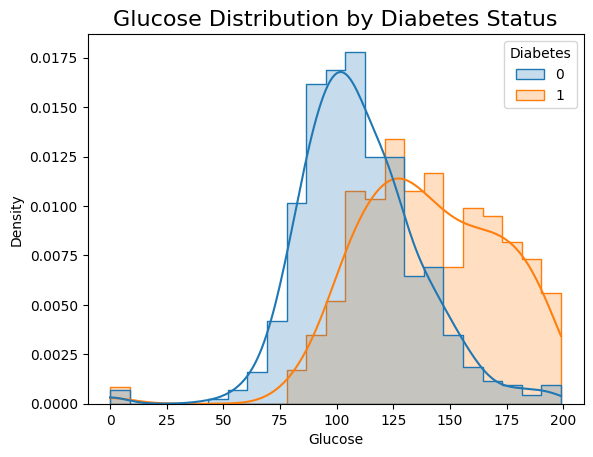

In [27]:
# Glucose x Diabetes
sns.histplot(data=df_1, x="Glucose", hue="Diabetes", kde=True, palette=["#1f77b4", "#ff7f0e"], element="step", stat="density", common_norm=False)
plt.title("Glucose Distribution by Diabetes Status", fontsize=16)
plt.show()

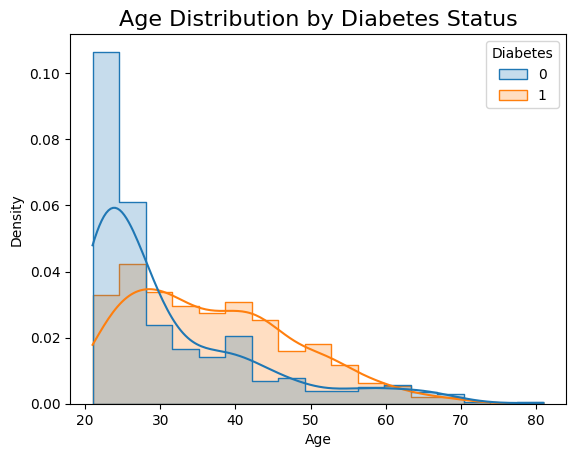

In [28]:
# Age x Diabetes
sns.histplot(data=df_1, x="Age", hue="Diabetes", kde=True, palette=["#1f77b4", "#ff7f0e"], element="step", stat="density", common_norm=False)
plt.title("Age Distribution by Diabetes Status", fontsize=16)
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_28416\3206189076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes',y='BMI',data=df_1,palette=sns.color_palette(["#8de5a1", "#ff7f0e"]))


Text(0.5, 1.0, 'BMI X Diabetes')

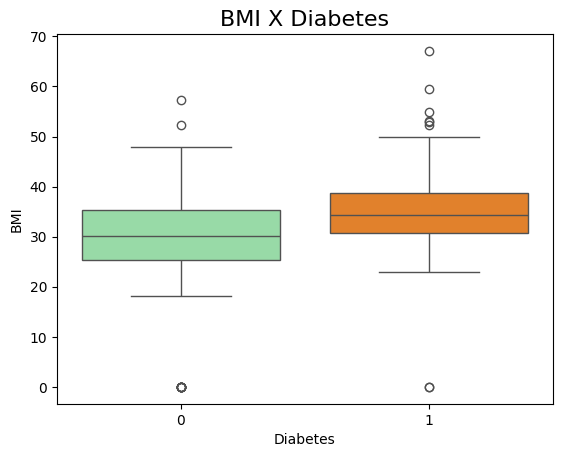

In [29]:
# BMI X Outcome
sns.boxplot(x='Diabetes',y='BMI',data=df_1,palette=sns.color_palette(["#8de5a1", "#ff7f0e"]))
# Add a title to the plot
plt.title("BMI X Diabetes", fontsize=16)

C:\Users\joyce\AppData\Local\Temp\ipykernel_28416\845194941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Diabetes", y="Pregnancies", data=df_1, palette=["#4ECDC4", "#ff7f0e"])


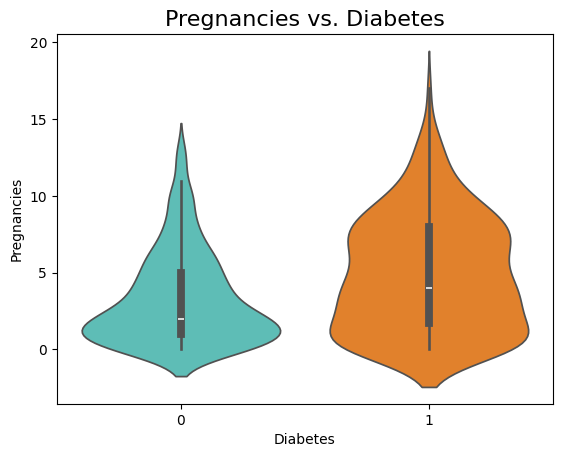

In [30]:
## Pregnancies X Outcome
sns.violinplot(x="Diabetes", y="Pregnancies", data=df_1, palette=["#4ECDC4", "#ff7f0e"])
plt.title("Pregnancies vs. Diabetes", fontsize=16)
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_28416\1068819239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes',y='BloodPressure',data=df_1,palette=sns.color_palette(["#8de5a1", "#ff7f0e"]))


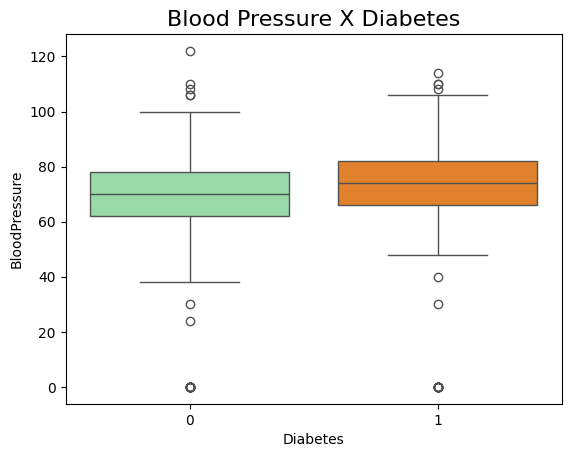

In [31]:
# Blood Pressure x Diabetes
sns.boxplot(x='Diabetes',y='BloodPressure',data=df_1,palette=sns.color_palette(["#8de5a1", "#ff7f0e"]))
# Add a title to the plot
plt.title("Blood Pressure X Diabetes", fontsize=16)
plt.show()

# Phase 3 :  Development of a prototype system
## Baseline :  Train-TEST Split (With PCA)

In [32]:
#  Data Splitting (70/15/15)
X_train_PCA_0, X_temp_PCA_0, y_train_PCA_0, y_temp_PCA_0 = train_test_split(x_1scaled, y_1, test_size=0.3, random_state=42,stratify=y_1)  # 70% train, 30% for val/test
X_val_PCA_0, X_test_PCA_0, y_val_PCA_0, y_test_PCA_0 = train_test_split(X_temp_PCA_0, y_temp_PCA_0, test_size=0.5, random_state=42,stratify=y_temp_PCA_0)

In [33]:
# Fit PCA on the training data
pca = PCA(n_components=8)  # Use n_components=6 to get the first 6 principal components
pca.fit(X_train_PCA_0)  # Fit PCA on the training data only

PCA(n_components=8)

In [34]:
# Transform the training, validation, and test sets using the fitted PCA
X_train_pca = pca.transform(X_train_PCA_0)
X_val_pca = pca.transform(X_val_PCA_0)
X_test_pca = pca.transform(X_test_PCA_0)

In [35]:
# Extract PC6 from the PCA-transformed data
pc6_train = X_train_pca[:, 5]  # 6th component (index 5)
pc6_val = X_val_pca[:, 5]      # 6th component (index 5)
pc6_test = X_test_pca[:, 5]     # 6th component (index 5)

In [36]:
# Add PC6 as a new feature to the datasets
X_train_pca_with_pc6 = np.column_stack((X_train_pca, pc6_train))
X_val_pca_with_pc6 = np.column_stack((X_val_pca, pc6_val))
X_test_pca_with_pc6 = np.column_stack((X_test_pca, pc6_test))

# AI Techqiue 1 : MLP

In [37]:
mlp = MLPClassifier(solver="adam", max_iter=500, activation="tanh",
                    hidden_layer_sizes=(50,100), alpha=0.2, batch_size=32,
                    learning_rate_init=0.001, random_state=2,early_stopping=True, validation_fraction=0.2,n_iter_no_change=10,tol=1e-4)

In [38]:
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
mlp_model_PCA_baseline = mlp.fit(X_train_pca_with_pc6, y_train_PCA_0)

In [39]:
# AI techqiue 1: MLP Classifier
y_pred_mlp_pca_baseline = mlp_model_PCA_baseline.predict(X_test_pca_with_pc6)
y_prob_mlp_pca_baseline = mlp_model_PCA_baseline.predict_proba(X_test_pca_with_pc6)[:,1] # Probability of positive class

# Evaluate the MLP model
test_eval(mlp_model_PCA_baseline, X_test_pca_with_pc6, y_test_PCA_0, algo="MLP", sampling="Before SMOTE")

Confusion Matrix
[[69  6]
 [22 19]] 

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        75
           1       0.76      0.46      0.58        41

    accuracy                           0.76       116
   macro avg       0.76      0.69      0.70       116
weighted avg       0.76      0.76      0.74       116
 

AUC-ROC
0.8472
AUC-PRC
0.7826
Sensitivity (Recall)     : 0.4634
Specificity              : 0.9200
G-Mean                   : 0.6529


In [40]:
mlp_output_baseline = mlp_model_PCA_baseline.predict_proba(X_train_pca_with_pc6) 

In [41]:
lr_model_baseline = LogisticRegression(penalty='l2', C=1.0,solver='lbfgs', max_iter=500,
                              random_state=42,fit_intercept=True,class_weight='balanced')

In [42]:
lr_model_baseline.fit(mlp_output_baseline, y_train_PCA_0)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [43]:
voting_mlp_lr_model_baseline = VotingClassifier(estimators=[('mlp', mlp_model_PCA_baseline), ('lr', lr_model_baseline)], voting='soft')

In [44]:
voting_mlp_lr_model_baseline.fit(X_train_pca_with_pc6, y_train_PCA_0)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(activation='tanh', alpha=0.2,
                                            batch_size=32, early_stopping=True,
                                            hidden_layer_sizes=(50, 100),
                                            max_iter=500, random_state=2,
                                            validation_fraction=0.2)),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=500,
                                                 random_state=42))],
                 voting='soft')

In [45]:
# AI techqiue 2: Voting Classifier (MLP+LR)
y_pred_mlp_lr_baseline = voting_mlp_lr_model_baseline.predict(X_test_pca_with_pc6)
y_prob_mlp_lr_baseline = voting_mlp_lr_model_baseline.predict_proba(X_test_pca_with_pc6)[:,1]

# Evaluate the Voting Classifier (MLP+LR) model
test_eval(voting_mlp_lr_model_baseline, X_test_pca_with_pc6, y_test_PCA_0, algo="Voting Classifier (MLP+LR)", sampling="Before SMOTE")

Confusion Matrix
[[65 10]
 [19 22]] 

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        75
           1       0.69      0.54      0.60        41

    accuracy                           0.75       116
   macro avg       0.73      0.70      0.71       116
weighted avg       0.74      0.75      0.74       116
 

AUC-ROC
0.8429
AUC-PRC
0.7722
Sensitivity (Recall)     : 0.5366
Specificity              : 0.8667
G-Mean                   : 0.6819


## AI Techqiue 3: MLP+RF

In [46]:
# Initialize and train the Random Forest model
rf_model_baseline = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=10,
                                  min_samples_split=2,min_samples_leaf=2,max_features='sqrt',criterion ='gini',
                                  n_jobs=-1)

In [47]:
# Fit RF on MLP features
rf_model_baseline.fit(mlp_output_baseline, y_train_PCA_0)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [48]:
voting_mlp_rf_model_baseline = VotingClassifier(estimators=[('mlp', mlp_model_PCA_baseline), ('rf', rf_model_baseline)], voting='soft')

In [49]:
# Train the Voting Classifier (MLP+Rf) BF
voting_mlp_rf_model_baseline.fit(X_train_pca_with_pc6, y_train_PCA_0)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(activation='tanh', alpha=0.2,
                                            batch_size=32, early_stopping=True,
                                            hidden_layer_sizes=(50, 100),
                                            max_iter=500, random_state=2,
                                            validation_fraction=0.2)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=2,
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42))],
                 voting='soft')

In [50]:
# AI techqiue 3: Voting Classifier (MLP+RF)
y_pred_mlp_rf_baseline = voting_mlp_rf_model_baseline.predict(X_test_pca_with_pc6)
y_prob_mlp_rf_baseline = voting_mlp_rf_model_baseline.predict_proba(X_test_pca_with_pc6)[:,1]

# Evaluate the Voting Classifier (MLP+RF) model
test_eval(voting_mlp_rf_model_baseline, X_test_pca_with_pc6, y_test_PCA_0, algo="Voting Classifier (MLP+RF)", sampling="Before SMOTE")

Confusion Matrix
[[68  7]
 [22 19]] 

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.91      0.82        75
           1       0.73      0.46      0.57        41

    accuracy                           0.75       116
   macro avg       0.74      0.69      0.70       116
weighted avg       0.75      0.75      0.73       116
 

AUC-ROC
0.8439
AUC-PRC
0.7749
Sensitivity (Recall)     : 0.4634
Specificity              : 0.9067
G-Mean                   : 0.6482


# Phase 4 : Development of Complete Sytem
# ** Hyparparmeter** Tuning with SMOTE (Using Training and Validation Sets) 
### Train Test Split : 70%

In [51]:
X_train_PCA_0, X_temp_PCA_0, y_train_PCA_0, y_temp_PCA_0 = train_test_split(pca_features , y_1, test_size=0.3, random_state=42,stratify=y_1)  # 70% train, 30% for val/test
X_val_PCA_0, X_test_PCA_0, y_val_PCA_0, y_test_PCA_0 = train_test_split(X_temp_PCA_0, y_temp_PCA_0, test_size=0.5, random_state=42,stratify=y_temp_PCA_0)

In [52]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_PCA_0, y_train_PCA_0)

print("Class distribution after applying SMOTE:", Counter(y_train_smote))

Class distribution after applying SMOTE: Counter({1: 350, 0: 350})


## AI Techique 1: MLP

In [53]:
param_dist = {
    'hidden_layer_sizes': [(5,8,16), (8,16,),(5,), (8,16,64)],
    'activation': ['relu','tanh','identity','logistic'],  
    'solver': ['adam','sgd'],       
    'alpha': [0.2,0.0001, 0.001, 0.01,1e-4,1e-3,0.00001],  
    'batch_size': [8,16,32,64,128],  
    'learning_rate_init': [0.001,0.01,0.0001],  
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500],
    'tol': [1e-4],  
    'early_stopping': [True],
    'validation_fraction': [0.1, 0.2]
}

In [54]:
mlp = MLPClassifier(random_state=200)
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=200)
mlp_model_tuned = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,  
    n_iter=150,
    cv=stratified_kfold,  
    n_jobs=-1,  
    verbose=3,  
    random_state=100,
    scoring='roc_auc',
    error_score='raise')

In [55]:
mlp_model_tuned.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=200, shuffle=True),
                   error_score='raise',
                   estimator=MLPClassifier(random_state=200), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'identity', 'logistic'],
                                        'alpha': [0.2, 0.0001, 0.001, 0.01,
                                                  0.0001, 0.001, 1e-05],
                                        'batch_size': [8, 16, 32, 64, 128],
                                        'early_stopping': [True],
                                        'hidden_layer_sizes': [(5, 8, 16),
                                                               (8, 16), (5,),
                                                               (8, 16, 64)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.0001],
                                        'max_iter': [500],
                                        'solver': ['adam', 'sgd'],
                                        'tol': [0.0001],
                                        'validation_fraction': [0.1, 0.2]},
                   random_state=100, scoring='roc_auc', verbose=3)

In [56]:
mlp_model = mlp_model_tuned.best_estimator_

In [57]:
# Evaluate on the validation set
y_val_pred_mlp = mlp_model.predict(X_val_PCA_0)  
y_val_prob_mlp = mlp_model.predict_proba(X_val_PCA_0)[:, 1]  


test_eval(mlp_model, X_val_PCA_0, y_val_PCA_0, algo="MLP", sampling="SMOTE")

Confusion Matrix
[[56 19]
 [10 30]] 

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.75      0.79        75
           1       0.61      0.75      0.67        40

    accuracy                           0.75       115
   macro avg       0.73      0.75      0.73       115
weighted avg       0.77      0.75      0.75       115
 

AUC-ROC
0.8017
AUC-PRC
0.6531
Sensitivity (Recall)     : 0.7500
Specificity              : 0.7467
G-Mean                   : 0.7483


## AI Techqiue 2 : MLP+LR

In [58]:
# Use the predicted probabilities from the MLP model on the resampled training data
mlp_output_tuned = mlp_model.predict_proba(X_train_smote)

In [59]:
param_grid_lr = {
    'penalty': ['l2'],              
    'C': [0.01, 0.1,0.001,0.002],     
    'solver': ['sag', 'lbfgs', 'liblinear'], 
    'max_iter': [100,200,500,50],           
    'fit_intercept': [True],       
    'class_weight': [ 'balanced'],    
}

In [60]:

mlp_lr_model_tuned = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    cv=StratifiedKFold(n_splits=10, shuffle=True),
    n_jobs=-1,
    verbose=2,
    scoring='f1_weighted',
)

In [61]:
mlp_lr_model_tuned.fit(mlp_output_tuned, y_train_smote)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.001, 0.002],
                         'class_weight': ['balanced'], 'fit_intercept': [True],
                         'max_iter': [100, 200, 500, 50], 'penalty': ['l2'],
                         'solver': ['sag', 'lbfgs', 'liblinear']},
             scoring='f1_weighted', verbose=2)

In [62]:
lr_model = mlp_lr_model_tuned.best_estimator_

In [63]:
voting_classifier_mlp_lr = VotingClassifier(estimators=[
    ('mlp', mlp_model),  # MLP Classifier
    ('lr', lr_model)  # Logistic Regression
], voting='soft')

In [64]:
voting_classifier_mlp_lr.fit(X_train_smote, y_train_smote)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(alpha=0.001, batch_size=64,
                                            early_stopping=True,
                                            hidden_layer_sizes=(5,),
                                            learning_rate_init=0.01,
                                            max_iter=500, random_state=200,
                                            validation_fraction=0.2)),
                             ('lr',
                              LogisticRegression(C=0.001,
                                                 class_weight='balanced',
                                                 random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

In [65]:
voting_classifier_mlp_lr_final = voting_classifier_mlp_lr.estimators

In [66]:
voting_classifier_mlp_lr_final_best_parma= voting_classifier_mlp_lr.get_params()
voting_classifier_mlp_lr_final_best_parma

{'estimators': [('mlp',
   MLPClassifier(alpha=0.001, batch_size=64, early_stopping=True,
                 hidden_layer_sizes=(5,), learning_rate_init=0.01, max_iter=500,
                 random_state=200, validation_fraction=0.2)),
  ('lr',
   LogisticRegression(C=0.001, class_weight='balanced', random_state=42,
                      solver='liblinear'))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'mlp': MLPClassifier(alpha=0.001, batch_size=64, early_stopping=True,
               hidden_layer_sizes=(5,), learning_rate_init=0.01, max_iter=500,
               random_state=200, validation_fraction=0.2),
 'lr': LogisticRegression(C=0.001, class_weight='balanced', random_state=42,
                    solver='liblinear'),
 'mlp__activation': 'relu',
 'mlp__alpha': 0.001,
 'mlp__batch_size': 64,
 'mlp__beta_1': 0.9,
 'mlp__beta_2': 0.999,
 'mlp__early_stopping': True,
 'mlp__epsilon': 1e-08,
 'mlp__hidden_layer_sizes': (5,),
 'mlp_

In [67]:
# Evaluate the best model on the validation set

y_val_pred_mlp_lr = voting_classifier_mlp_lr.predict(X_val_PCA_0)
y_val_prob__mlp_lr= voting_classifier_mlp_lr.predict_proba(X_val_PCA_0)[:,1] 


print("Evaluation of MLP+LR Classifier on Validation Set")
test_eval(voting_classifier_mlp_lr, X_val_PCA_0, y_val_PCA_0, algo="MLP+LR", sampling="SMOTE")

Evaluation of MLP+LR Classifier on Validation Set
Confusion Matrix
[[56 19]
 [10 30]] 

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.75      0.79        75
           1       0.61      0.75      0.67        40

    accuracy                           0.75       115
   macro avg       0.73      0.75      0.73       115
weighted avg       0.77      0.75      0.75       115
 

AUC-ROC
0.8017
AUC-PRC
0.6533
Sensitivity (Recall)     : 0.7500
Specificity              : 0.7467
G-Mean                   : 0.7483


## AI Techqiue 3: MLP+Random Forest

In [68]:
rf_params = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10,20,30,50,None],
    'min_samples_split': [2],
    'min_samples_leaf': [1,2,5,10],     
    'max_features': ['log2', 'sqrt',None], 
    'criterion': ['gini','entropy'],   
    'class_weight': [ 'balanced']     
}

In [69]:
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
mlp_rf_model_tuned = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params,
                                      n_iter=50,   # Number of random combinations to try
                                      cv=cv,
                                      random_state=42,
                                      n_jobs=-1,   # Use all CPU cores for parallelism
                                      verbose=2,
                                      scoring='f1_weighted')

In [70]:
mlp_rf_model_tuned.fit(mlp_output_tuned, y_train_smote)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 50, None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [71]:
rf_model = mlp_rf_model_tuned.best_estimator_

In [72]:
voting_classifier_mlp_rf = VotingClassifier(estimators=[
    ('mlp', mlp_model), 
    ('rf', rf_model)  
], voting='soft')

In [73]:
voting_classifier_mlp_rf.fit(X_train_smote, y_train_smote)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(alpha=0.001, batch_size=64,
                                            early_stopping=True,
                                            hidden_layer_sizes=(5,),
                                            learning_rate_init=0.01,
                                            max_iter=500, random_state=200,
                                            validation_fraction=0.2)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=30,
                                                     max_features='log2',
                                                     min_samples_leaf=10,
                                                     n_estimators=200,
                                                     random_state=42))],
                 voting='soft')

In [74]:
print("Evaluation of Voting Classifier (MLP+RF) on Validation Set")

y_val_pred_mlp_rf = voting_classifier_mlp_rf.predict(X_val_PCA_0)
y_val_prob__mlp_rf= voting_classifier_mlp_rf.predict_proba(X_val_PCA_0)[:,1] 

test_eval(voting_classifier_mlp_rf, X_val_PCA_0, y_val_PCA_0, algo="Voting Classifier (MLP+RF)", sampling="SMOTE")

Evaluation of Voting Classifier (MLP+RF) on Validation Set
Confusion Matrix
[[53 22]
 [ 9 31]] 

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        75
           1       0.58      0.78      0.67        40

    accuracy                           0.73       115
   macro avg       0.72      0.74      0.72       115
weighted avg       0.76      0.73      0.74       115
 

AUC-ROC
0.8110
AUC-PRC
0.6698
Sensitivity (Recall)     : 0.7750
Specificity              : 0.7067
G-Mean                   : 0.7400


# ROC-AUC Curve Comparison

In [75]:
# AUC-ROC for MLP Model 
fpr_mlp, tpr_mlp, _ = roc_curve(y_val_PCA_0 ,y_val_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

In [76]:
# AUC-ROC for MLP-LR model
fpr_mlp_lr, tpr_mlp_lr, _ = roc_curve(y_val_PCA_0 ,y_val_prob__mlp_lr)
roc_auc_mlp_lr = auc(fpr_mlp_lr, tpr_mlp_lr)

In [77]:
# AUC-ROC for MLP-RF model
fpr_mlp_rf, tpr_mlp_rf, _ = roc_curve(y_val_PCA_0, y_val_prob__mlp_rf)
roc_auc_mlp_rf = auc(fpr_mlp_rf, tpr_mlp_rf)

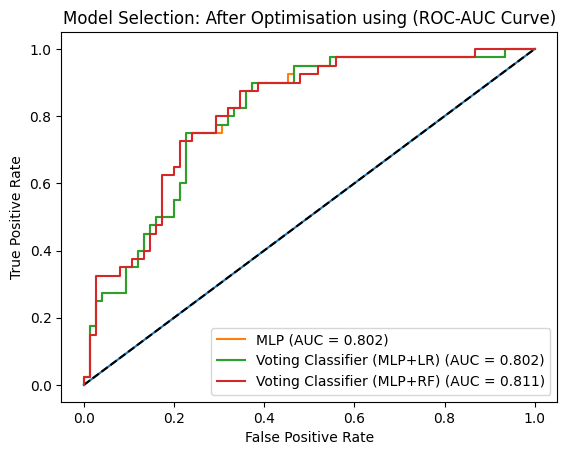

In [78]:
plt.plot([0, 1], [0, 1], [0,1],'k--')
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = %0.3f)' % roc_auc_mlp)
plt.plot(fpr_mlp_lr, tpr_mlp_lr, label='Voting Classifier (MLP+LR) (AUC = %0.3f)' % roc_auc_mlp_lr)
plt.plot(fpr_mlp_rf, tpr_mlp_rf, label='Voting Classifier (MLP+RF) (AUC = %0.3f)' % roc_auc_mlp_rf)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Selection: After Optimisation using (ROC-AUC Curve)')
plt.legend(loc="lower right")
plt.show()

# ROC-PRC Curve Comparison

In [79]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [80]:
# Plot Precision-Recall curve for MLP
precision_mlp, recall_mlp_, _ = precision_recall_curve(y_val_PCA_0, y_val_prob_mlp)
prc_auc_mlp_ = average_precision_score(y_val_PCA_0, y_val_prob_mlp)

In [81]:
# Plot Precision-Recall curve for MLP + LR 
precision_mlp_lr, recall_mlp_lr, _ = precision_recall_curve(y_val_PCA_0, y_val_prob__mlp_lr)
prc_auc_mlp_lr_ = average_precision_score(y_val_PCA_0, y_val_prob__mlp_lr)

In [82]:
# Plot Precision-Recall curve for MLP + RF
precision_mlp_rf, recall_mlp_rf, _ = precision_recall_curve(y_val_PCA_0, y_val_prob__mlp_rf)
prc_auc_mlp_rf_ = average_precision_score(y_val_PCA_0, y_val_prob__mlp_rf)

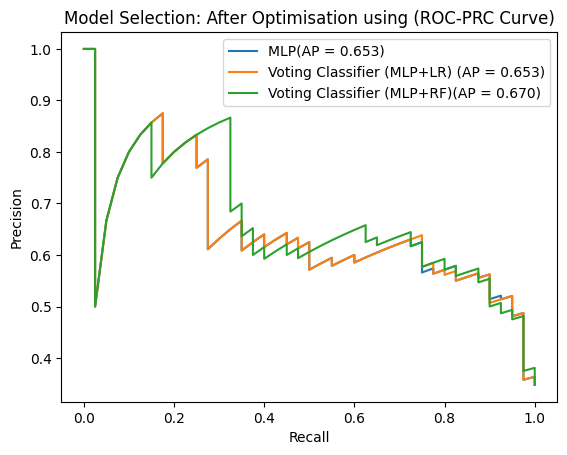

In [83]:
# Plot the precision-recall curve for all
plt.plot(recall_mlp_, precision_mlp, label='MLP(AP = %0.3f)' % prc_auc_mlp_)
plt.plot(recall_mlp_lr, precision_mlp_lr, label='Voting Classifier (MLP+LR) (AP = %0.3f)' % prc_auc_mlp_lr_)
plt.plot(recall_mlp_rf, precision_mlp_rf, label='Voting Classifier (MLP+RF)(AP = %0.3f)' % prc_auc_mlp_rf_)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Model Selection: After Optimisation using (ROC-PRC Curve)')
plt.legend()
plt.show()

# Phase 5: Evaluate the Final system



## AI Techqiue : MLP +LR

In [84]:
# Evaluate the best model on the test set

y_test_pred_mlp_lr_final = voting_classifier_mlp_lr.predict(X_test_PCA_0)
y_test_prob__mlp_lr_final= voting_classifier_mlp_lr.predict_proba(X_test_PCA_0)[:,1] 


print("Evaluation of MLP+LR Classifier on test Set")
test_eval(voting_classifier_mlp_lr, X_test_PCA_0, y_test_PCA_0, algo="MLP+LR", sampling="SMOTE")



Evaluation of MLP+LR Classifier on test Set
Confusion Matrix
[[60 15]
 [12 29]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        75
           1       0.66      0.71      0.68        41

    accuracy                           0.77       116
   macro avg       0.75      0.75      0.75       116
weighted avg       0.77      0.77      0.77       116
 

AUC-ROC
0.8361
AUC-PRC
0.7547
Sensitivity (Recall)     : 0.7073
Specificity              : 0.8000
G-Mean                   : 0.7522


Text(0.5, 1.0, 'Confusion Matrix of MLP+LR Classifier')

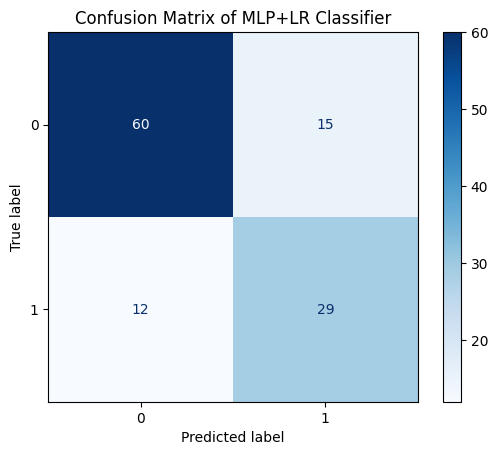

In [85]:
# Confusion Matrix
cm_mlp_rf_pca = confusion_matrix(y_test_PCA_0, y_test_pred_mlp_lr_final)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp_rf_pca, display_labels=voting_classifier_mlp_lr.classes_)
disp_mlp.plot(cmap='Blues')
plt.title("Confusion Matrix of MLP+LR Classifier")

### Train / Validation / Test Loss Via Tensorflow

In [86]:
import tensorflow as tf
from tensorflow.keras import regularizers

def create_mlp_model(input_shape):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(5, 
                                    activation='relu', 
                                    input_shape=input_shape, 
                                    kernel_regularizer=regularizers.l2(0.001)))  
    model.add(tf.keras.layers.BatchNormalization())  
    model.add(tf.keras.layers.Dropout(0.2))  

    # Output layer (Binary classification)
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Learning rate schedule (inverse time decay)
    lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate=0.01, 
        decay_steps=500, 
        decay_rate=0.5,  
        staircase=False
    )

    # Compile model with Adam optimizer and adaptive learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [87]:
input_shape = (X_train_PCA_0.shape[1],)

In [88]:
# Create model
model = create_mlp_model(input_shape)

d:\Tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# EarlyStopping callback to monitor validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [90]:
class TestLossCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_accuracy = self.model.evaluate(X_test_PCA_0, y_test_PCA_0, verbose=0)
        print(f"Test Loss after epoch {epoch + 1}: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
        logs['test_loss'] = test_loss  
        logs['test_accuracy'] = test_accuracy  


In [91]:
# Train the model and track train, val, and test loss
history = model.fit(
    X_train_PCA_0, y_train_PCA_0,
    epochs=500,  
    batch_size=64, 
    validation_data=(X_val_PCA_0, y_val_PCA_0),
    callbacks=[early_stopping, TestLossCallback()],  
    verbose=2
)

Epoch 1/500
Test Loss after epoch 1: 0.6417, Test Accuracy: 0.7414
9/9 - 1s - 151ms/step - accuracy: 0.6480 - loss: 0.6611 - val_accuracy: 0.6696 - val_loss: 0.6509 - test_loss: 0.6417 - test_accuracy: 0.7414
Epoch 2/500
Test Loss after epoch 2: 0.6219, Test Accuracy: 0.7241
9/9 - 0s - 29ms/step - accuracy: 0.6760 - loss: 0.6146 - val_accuracy: 0.6609 - val_loss: 0.6272 - test_loss: 0.6219 - test_accuracy: 0.7241
Epoch 3/500
Test Loss after epoch 3: 0.6076, Test Accuracy: 0.6897
9/9 - 0s - 25ms/step - accuracy: 0.7207 - loss: 0.5602 - val_accuracy: 0.6522 - val_loss: 0.6104 - test_loss: 0.6076 - test_accuracy: 0.6897
Epoch 4/500
Test Loss after epoch 4: 0.6005, Test Accuracy: 0.6638
9/9 - 0s - 33ms/step - accuracy: 0.7430 - loss: 0.5380 - val_accuracy: 0.6522 - val_loss: 0.5999 - test_loss: 0.6005 - test_accuracy: 0.6638
Epoch 5/500
Test Loss after epoch 5: 0.5988, Test Accuracy: 0.6552
9/9 - 0s - 35ms/step - accuracy: 0.7672 - loss: 0.5271 - val_accuracy: 0.6522 - val_loss: 0.5961 - t

In [92]:
# Accessing training, validation, and test loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
test_loss = history.history['test_loss']  
epochs = range(1, len(train_loss) + 1)

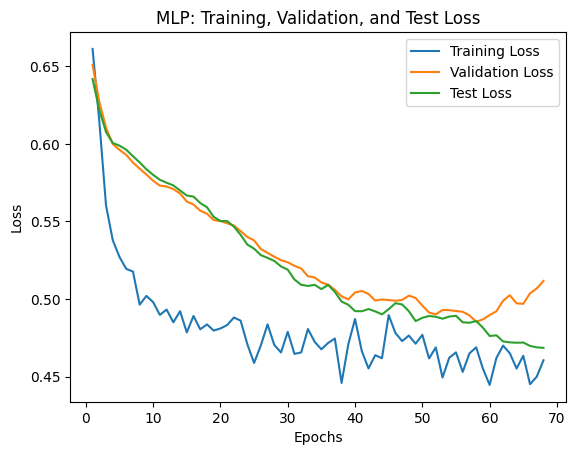

In [93]:
# Plot the training, validation, and test loss curves
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('MLP: Training, Validation, and Test Loss')
plt.show()

In [94]:
#Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_PCA_0, y_test_PCA_0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7979 - loss: 0.4387 
Test Loss: 0.48590460419654846
Test Accuracy: 0.75


In [95]:
# Predict probabilities for positive class (1)
y_train_prob_mlp_lr_final = voting_classifier_mlp_lr.predict_proba(X_train_smote)[:, 1]  # Train set

In [96]:
# Compute ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train_smote, y_train_prob_mlp_lr_final)
fpr_test, tpr_test, _ = roc_curve(y_test_PCA_0, y_test_prob__mlp_lr_final)

In [97]:
# Compute AUC scores
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

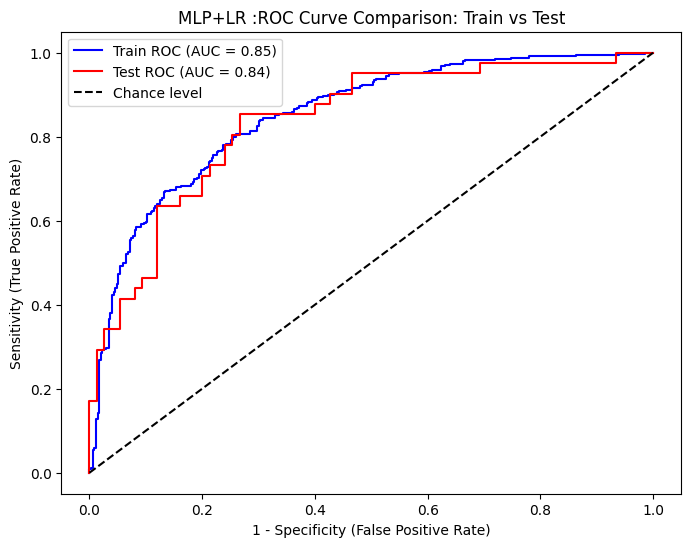

In [98]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Chance level")  

# Formatting
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('MLP+LR :ROC Curve Comparison: Train vs Test')
plt.legend()
plt.show()

In [99]:
# Evaluate model with cross-validation on test set
voting_classifier_mlp_lr_fine_tune_test_cv_scores = cross_val_score(voting_classifier_mlp_lr, X_train_PCA_0, y_train_PCA_0 ,cv=10, scoring='accuracy')

print(f"Cross-validated accuracy scores: {voting_classifier_mlp_lr_fine_tune_test_cv_scores}")
print(f"Mean accuracy score: {voting_classifier_mlp_lr_fine_tune_test_cv_scores.mean()}")
print(f"Std accuracyC score: {voting_classifier_mlp_lr_fine_tune_test_cv_scores.std()}")

Cross-validated accuracy scores: [0.7962963  0.75925926 0.74074074 0.7037037  0.7962963  0.75925926
 0.72222222 0.86792453 0.79245283 0.75471698]
Mean accuracy score: 0.769287211740042
Std accuracyC score: 0.0441243350622138


# Model Serialization 

In [100]:
with open('voting_classifier_mlp_lr_final.pkl', 'wb') as f:
    pickle.dump(voting_classifier_mlp_lr_final, f)

print("Model saved successfully!")

Model saved successfully!


In [101]:
# Load the model from the file
with open('voting_classifier_mlp_lr_final.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully!")

Model loaded successfully!


In [102]:
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy', n_jobs=n_jobs
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    return train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std

In [103]:
train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = plot_learning_curve(
    voting_classifier_mlp_lr, X_train_PCA_0, y_train_PCA_0, cv=10, n_jobs=-1
)

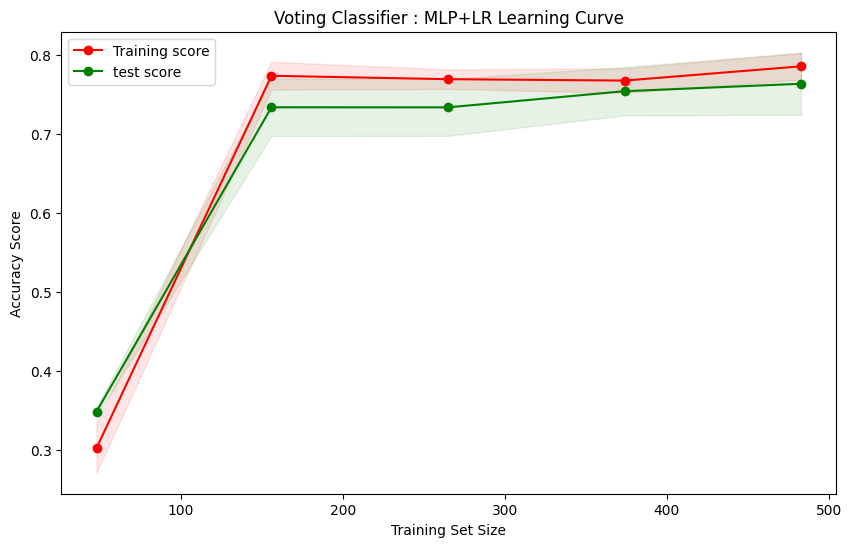

In [104]:
plt.figure(figsize=(10, 6))
plt.title("Voting Classifier : MLP+LR Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")


plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="test score")

plt.legend(loc="best")
plt.show()

# Performance Index : Efficency Index

In [105]:
def track_performance(model, X_train_smote, y_train_smote, X_test, y_test, use_gpu=False):
    # Track CPU and Memory usage before starting the training
    cpu_before_training = psutil.cpu_percent(interval=0)
    memory_before_training = psutil.virtual_memory().percent

    # Track training time
    start_train_time = time.time()

    # Train the model
    model.fit(X_train_smote, y_train_smote)

    end_train_time = time.time()
    training_time = end_train_time - start_train_time

    # Track CPU and Memory usage after training
    cpu_after_training = psutil.cpu_percent(interval=0)
    memory_after_training = psutil.virtual_memory().percent

    # Track model size
    model_filename = 'temp_model.pkl'
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)
    model_size = os.path.getsize(model_filename) / (1024 * 1024)  # in MB
    os.remove(model_filename)  # Clean up the temporary file

    # Track inference time (latency for a single prediction)
    start_inference_time = time.time()
    y_pred = model.predict(X_test)
    end_inference_time = time.time()
    inference_time = end_inference_time - start_inference_time

    # Latency for a single prediction (average latency)
    single_prediction_latency = inference_time / len(X_test)

    # Calculate accuracy and F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion Matrix to calculate Sensitivity, Specificity, and Precision
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Extract TP, FP, FN, TN from confusion matrix

    sensitivity = tp / (tp + fn) if tp + fn != 0 else 0
    specificity = tn / (tn + fp) if tn + fp != 0 else 0

    # Calculate Scalability Index (Training Time / Dataset Size)
    scalability = training_time / len(X_train_smote)

    # For CPU power consumption
    cpu_power_consumption = psutil.cpu_freq().current * psutil.cpu_percent(interval=1) / 100  # in watts
    energy_training = cpu_power_consumption * training_time if cpu_power_consumption else 0
    energy_inference = cpu_power_consumption * inference_time if cpu_power_consumption else 0
    total_energy_consumption = energy_training + energy_inference

    # Calculate Energy Consumption Index (Energy per F1 score)
    energy_consumption_index = total_energy_consumption / f1 if f1 != 0 else None

    # Print results with Efficiency Metrics
    print(f"CPU Usage Before Training: {cpu_before_training}%")
    print(f"CPU Usage After Training: {cpu_after_training}%")
    print(f"Memory Usage Before Training: {memory_before_training}%")
    print(f"Memory Usage After Training: {memory_after_training}%")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Inference Time: {inference_time:.4f} seconds")
    print(f"Model Size: {model_size:.2f} MB")
    print(f"Scalability Index: {scalability:.4f}")
    if energy_consumption_index:
        print(f"Energy Consumption Index: {energy_consumption_index:.4f} Joules per F1 Score")

    return {
        "cpu_before_training": cpu_before_training,
        "cpu_after_training": cpu_after_training,
        "memory_before_training": memory_before_training,
        "memory_after_training": memory_after_training,
        "training_time": training_time,
        "inference_time": inference_time,
        "model_size": model_size,
        "accuracy": accuracy,
        "f1_score": f1,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "scalability": scalability,
        "energy_consumption_index": energy_consumption_index,
    }


In [106]:
print("Performance Measure Index for MLP+LR Classifier : Test Set")
mlp_lr_performance = track_performance(voting_classifier_mlp_lr,X_train_smote,y_train_smote,X_test_PCA_0,y_test_PCA_0)

Performance Measure Index for MLP+LR Classifier : Test Set
CPU Usage Before Training: 53.9%
CPU Usage After Training: 33.3%
Memory Usage Before Training: 48.7%
Memory Usage After Training: 48.7%
Accuracy: 0.7672
Sensitivity: 0.7073
Specificity: 0.8000
Training Time: 0.0290 seconds
Inference Time: 0.0000 seconds
Model Size: 0.02 MB
Scalability Index: 0.0000
Energy Consumption Index: 14.4785 Joules per F1 Score


# Post-Processing: SHAP

In [107]:
shap.initjs()

In [108]:
pca = PCA(n_components=8)
X_train_PCA = pca.fit_transform(x_1scaled)

In [109]:
feature_names = X_1.columns

In [110]:
lr =LogisticRegression(C=0.001, class_weight='balanced', random_state=42)
lr.fit(X_train_PCA_0, y_train_PCA_0)

LogisticRegression(C=0.001, class_weight='balanced', random_state=42)

In [111]:
# Create a KernelExplainer
explainer = shap.KernelExplainer(lr.predict, X_train_PCA_0)

Using 537 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [112]:
# Explain the prediction using the KernelExplainer
shap_values = explainer.shap_values(X_test_PCA_0)

100%|██████████| 116/116 [00:01<00:00, 99.45it/s] 


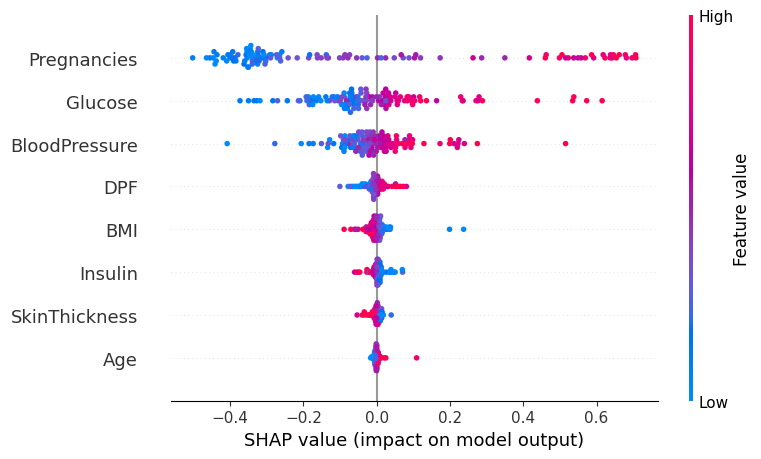

In [113]:
shap.summary_plot(shap_values, X_test_PCA_0, show=False, feature_names=feature_names)
plt.show()

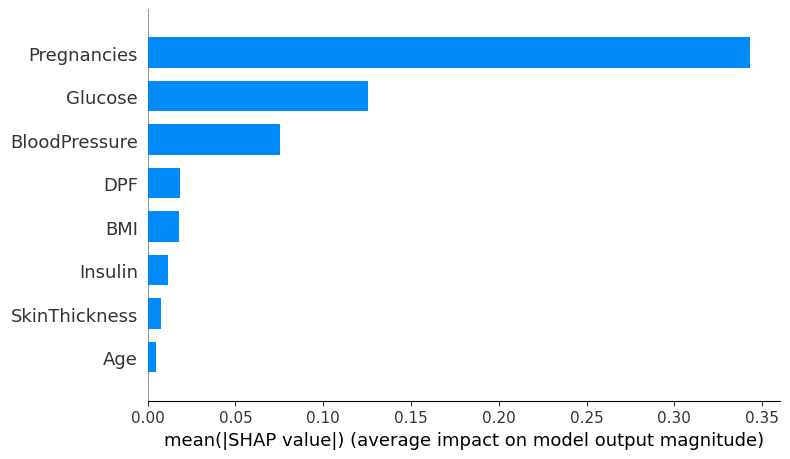

In [114]:
shap.summary_plot(shap_values, X_test_PCA_0, plot_type="bar",feature_names=feature_names)

# Function for Risk Threshold

In [115]:
fpr, tpr, thresholds = roc_curve(y_test_PCA_0, y_test_prob__mlp_lr_final) 
roc_auc = auc(fpr, tpr)

In [116]:
# Find the Optimal Threshold (using Youden's J statistic):
gmeans = np.sqrt(tpr * (1 - fpr))
ix = np.argmax(gmeans)
best_threshold = thresholds[ix]
print(f"Best Threshold (Youden's J): {best_threshold}")

Best Threshold (Youden's J): 0.47283103162694967


In [117]:
def predict_diabetes_risk_from_user_input(
    age, bmi, pregnancies, glucose, insulin, blood_pressure, DiabetesPedigreeFunction, SkinThickness, model=voting_classifier_mlp_lr, threshold=0.47):
    """
    Predicts diabetes risk based on user input and trained model.

    Args:
        age (float): Age of the user.
        bmi (float): BMI value of the user.
        pregnancies (float): Number of pregnancies.
        glucose (float): Glucose level.
        insulin (float): Insulin level.
        blood_pressure (float): Blood pressure value.
        DiabetesPedigreeFunction (float): Diabetes pedigree function value.
        SkinThickness (float): Skin thickness measurement.
        model: Trained voting classifier model (e.g., MLP+LR hybrid).
        threshold (float): Threshold to classify High/Low risk.

    Returns:
        dict: A dictionary containing probability and risk category (High/Low Risk).
    """
   
    features = np.array([[age, bmi, pregnancies, glucose, insulin, blood_pressure, DiabetesPedigreeFunction, SkinThickness]])

    probabilities = model.predict_proba(features)[:, 1]
     # Convert probability to percentage
    probability_percentage = probabilities[0] * 100


    
    categories = np.where(probabilities >= threshold, "High Risk", "Low Risk")
    result = {
        "Probability(%)": round(probability_percentage, 2),  
        "Category": categories[0]
    }
    
    return result

In [118]:
## High Risk # 1
result = predict_diabetes_risk_from_user_input(
    age = 21,
    bmi = 18.2,
    pregnancies = 0,
    glucose = 148,
    insulin = 0,
    blood_pressure = 0,
    DiabetesPedigreeFunction=0.078,
    SkinThickness= 0,
)

print(f"Diabetes Risk Prediction: {result}")

Diabetes Risk Prediction: {'Probability(%)': np.float64(84.43), 'Category': np.str_('High Risk')}


In [119]:
## High Risk 2
result = predict_diabetes_risk_from_user_input(
    age = 45,
    bmi = 67.1,
    pregnancies = 5,
    glucose = 44,
    insulin = 6,
    blood_pressure = 46,
    DiabetesPedigreeFunction=0.47,
    SkinThickness= 0,
)

print(f"Diabetes Risk Prediction: {result}")

Diabetes Risk Prediction: {'Probability(%)': np.float64(95.41), 'Category': np.str_('High Risk')}


In [120]:
## Low Risk 1
result = predict_diabetes_risk_from_user_input(
    age = 2,
    bmi = 0,
    pregnancies = 0,
    glucose = 0,
    insulin = 0,
    blood_pressure = 2,
    DiabetesPedigreeFunction=0.078,
    SkinThickness= 0,
)

print(f"Diabetes Risk Prediction: {result}")

Diabetes Risk Prediction: {'Probability(%)': np.float64(30.28), 'Category': np.str_('Low Risk')}


In [121]:
## Low Risk # 2
result = predict_diabetes_risk_from_user_input(
    age = 20,
    bmi = 0,
    pregnancies = 0,
    glucose = 4,
    insulin = 0,
    blood_pressure = 45,
    DiabetesPedigreeFunction=0.47,
    SkinThickness= 35,
)

print(f"Diabetes Risk Prediction: {result}")

Diabetes Risk Prediction: {'Probability(%)': np.float64(30.43), 'Category': np.str_('Low Risk')}
